<h2> Exploratory analysis of a version of VGG neural network on IDC data</h2>
<p> Version of a VGG arhitecture is tested on 30,000 images from IDC-data set. </p>

In [1]:
import numpy as np
import h5py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Conv2D, BatchNormalization, Dense, Dropout, MaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam, Adagrad
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
def load_dataset():

    f = h5py.File('Test_Set.h5', 'r')
    X_test = np.array(f['array'][:]) # your train set features
    f.close()
    
    f = h5py.File('Test_Label.h5', 'r')
    Y_test = np.array(f['array'][:]) # your train set features
    f.close()
    
    f = h5py.File('Train_Set.h5', 'r')
    X = np.array(f['array'][:]) # your train set features
    f.close()
    
    f = h5py.File('Train_Label.h5', 'r')
    Y = np.array(f['array'][:]) # your train set features
    f.close()
    
    return X, Y, X_test, Y_test

In [3]:
# --------- Load the data ------------

X, Y, X_test, Y_test = load_dataset()

In [4]:
# -------- Transform (30,000 x 1) matrix Y into (30,000 x 2) dimensional matrix Y_classes ------------------
Y_classes = np.zeros((Y.shape[0], 2))
Y_classes[np.where(Y==0)[0],0] = 1
Y_classes[np.where(Y==1)[0],1] = 1

Y_classes_test = np.zeros((Y_test.shape[0], 2))
Y_classes_test[np.where(Y_test==0)[0],0] = 1
Y_classes_test[np.where(Y_test==1)[0],1] = 1

print('Total number of examples to train ', Y.shape[0])
print('Number of negative examples', len(np.where (Y == 1)[0]))

Total number of examples to train  30000
Number of negative examples 15000


<p style = "color:orange; font-size:24px; text-align:center;"> Define the model which is a version of VGG model </p>

In [5]:
def Cancer_clasifier(input_shapes):
    
    X_input = Input(input_shapes)
    
    XX = Conv2D(16, kernel_size = (3,3), strides=(1, 1), padding = 'same', 
                kernel_initializer='GlorotNormal')(X_input)
    XX = Conv2D(16, kernel_size = (3,3), strides=(1, 1), padding = 'same')(XX)
    XX = Activation('relu')(XX)
    XX = MaxPooling2D(2,2)(XX)
    XX = Dropout(0.5)(XX)

    for no_filters in [32, 64]:
        XX = Conv2D(no_filters, kernel_size = (3,3), strides=(1, 1), padding = 'same')(XX)
        XX = Conv2D(no_filters, kernel_size = (3,3), strides=(1, 1), padding = 'same')(XX)
        XX = Activation('relu')(XX)
        XX = MaxPooling2D(2,2)(XX)
        XX = Dropout(0.5)(XX)

    
    # --- Output Layer
    XX = Flatten()(XX)
    
    XX = Dense(200, activation = 'relu')(XX)
    XX = Dropout(0.5)(XX)
    XX = Dense(200, activation = 'relu')(XX)
    XX = Dropout(0.5)(XX)
    
    XX = Dense(2, activation='softmax')(XX)
    
    model = Model(inputs = X_input, outputs = XX, name='Cancer_clasifier')
              
    return model

<p style = "color:orange; font-size:24px; text-align:center;"> Train the model </p>

In [6]:
my_cancer_model = Cancer_clasifier(X.shape[1:])
my_cancer_model.summary()

optimizing_function = Adagrad(learning_rate=0.001)

my_cancer_model.compile(optimizer = optimizing_function, loss='categorical_crossentropy', metrics=['accuracy'])

history = my_cancer_model.fit(x = X, y = Y_classes, validation_data=(X_test,Y_classes_test), epochs = 100, batch_size = 64)

Model: "Cancer_clasifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
activation (Activation)      (None, 50, 50, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)   

469/469 [==============================] - 179s 381ms/step - loss: 0.3796 - accuracy: 0.8411 - val_loss: 0.6372 - val_accuracy: 0.6597
Epoch 90/100
469/469 [==============================] - 190s 404ms/step - loss: 0.3815 - accuracy: 0.8389 - val_loss: 0.6605 - val_accuracy: 0.6456
Epoch 91/100
469/469 [==============================] - 205s 437ms/step - loss: 0.3844 - accuracy: 0.8382 - val_loss: 0.6310 - val_accuracy: 0.6603
Epoch 92/100
469/469 [==============================] - 182s 389ms/step - loss: 0.3795 - accuracy: 0.8400 - val_loss: 0.6666 - val_accuracy: 0.6412
Epoch 93/100
469/469 [==============================] - 182s 388ms/step - loss: 0.3798 - accuracy: 0.8422 - val_loss: 0.6412 - val_accuracy: 0.6589
Epoch 94/100
469/469 [==============================] - 180s 383ms/step - loss: 0.3797 - accuracy: 0.8418 - val_loss: 0.6632 - val_accuracy: 0.6413
Epoch 95/100
469/469 [==============================] - 180s 383ms/step - loss: 0.3775 - accuracy: 0.8409 - val_loss: 0.7024 

Evaluate model with confussion matrix

<p style = "color:orange; font-size:24px; text-align:center;"> Plot the loss </p>

Text(0.5, 1.0, 'Batch = 64, LR_Adagrad = 0.001, Model 1 trained on 15,000 negative and 15,000 positive examples')

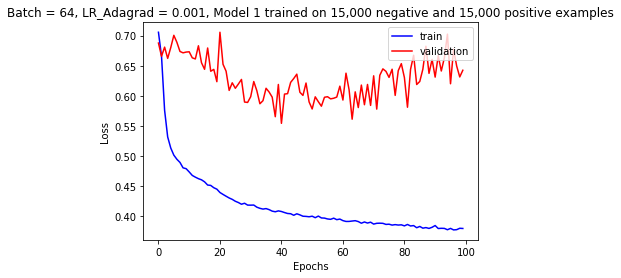

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.legend(['train', 'validation'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch = 64, LR_Adagrad = 0.001, Model 1 trained on 15,000 negative and 15,000 positive examples')

# -- If you want to save the image uncomment this line
#plt.savefig('Model1_Exploratory.png')

As we see from the plot, validation error fluctuates.